Machine Learning Model for Dengue Fever in San Juan and Iquitos
----

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from dengai import data_util
from dengai import multi_perceptron

Preprocess Data
----

In [3]:
sj, iq = data_util.get_train_feature_label()

sj_features = sj.drop(["total_cases"], axis=1)
sj_labels = sj[["total_cases"]]

iq_features = iq.drop(["total_cases"], axis=1)
iq_labels = iq[["total_cases"]]


Split Testing Data and Randomize
----

In [4]:
# Split data intro training and testing sets
sj_x_train, sj_x_test, sj_y_train, sj_y_test = train_test_split(sj_features, 
                                                                sj_labels, 
                                                                test_size=0.33, 
                                                                random_state=42)

iq_x_train, iq_x_test, iq_y_train, iq_y_test = train_test_split(iq_features, 
                                                                iq_labels, 
                                                                test_size=0.33, 
                                                                random_state=42)

Model Training for San Juan
----

In [5]:
# Add 2 hidden layers, each with 256 nodes
sj_x_size = sj_x_train.shape[1] # Number of input nodes
sj_h1_size = 256 # Number of hidden nodes for l1
sj_h2_size = 256 # Number of hidden nodes for l2
sj_y_size = sj_y_train.shape[1] # Number of outcomes 

sj_x = tf.placeholder("float32", [None, sj_x_size])
sj_y = tf.placeholder("float32", [None, sj_y_size])
sj_keep_prob = tf.placeholder(tf.float32)
                                
#l1 = multi_perceptron.add_layer(x, in_size=x_size, out_size=h1_size, activation_function=tf.nn.relu)
#predict = multi_perceptron.add_layer(l1, in_size=h1_size, out_size=y_size, activation_function=None)
 
# Weight initializations
sj_w_1 = multi_perceptron.init_weights((sj_x_size, sj_h1_size))
sj_w_2 = multi_perceptron.init_weights((sj_h1_size, sj_h2_size))
sj_w_3 = multi_perceptron.init_weights((sj_h2_size, sj_y_size))

sj_predict = multi_perceptron.forwardprop(sj_x, sj_w_1, sj_w_2, sj_w_3, sj_keep_prob)
    

In [16]:
# Backwards Propogation
sj_cost = tf.reduce_mean(tf.reduce_sum(tf.square(sj_y-sj_predict),reduction_indices=[1]))
sj_updates = tf.train.GradientDescentOptimizer(0.00001).minimize(sj_cost)

In [7]:
sj_init = tf.global_variables_initializer()
sj_sess = tf.Session()
sj_sess.run(sj_init)

In [17]:
for epoch in range(20):
        # Train with each example
        for i in range(len(sj_x_train)):
            sj_sess.run(sj_updates, feed_dict={sj_x: sj_x_train[i: i + 1], sj_y: sj_y_train[i: i + 1], sj_keep_prob:0.5})

        train_error = mean_absolute_error(sj_y_train, sj_sess.run(sj_predict, feed_dict={sj_x: sj_x_train, sj_keep_prob:1}))
        test_error  = mean_absolute_error(sj_y_test, sj_sess.run(sj_predict, feed_dict={sj_x: sj_x_test, sj_keep_prob:1}))

        print("Epoch = %d, train error = %.2f, test error = %.2f"
              % (epoch + 1, train_error, test_error))

Epoch = 1, train error = 49.10, test error = 48.81
Epoch = 2, train error = 49.74, test error = 49.47
Epoch = 3, train error = 50.14, test error = 49.89
Epoch = 4, train error = 49.71, test error = 49.45
Epoch = 5, train error = 49.83, test error = 49.57
Epoch = 6, train error = 49.91, test error = 49.66
Epoch = 7, train error = 49.96, test error = 49.71
Epoch = 8, train error = 50.34, test error = 50.11
Epoch = 9, train error = 50.37, test error = 50.14
Epoch = 10, train error = 50.64, test error = 50.41
Epoch = 11, train error = 50.65, test error = 50.43
Epoch = 12, train error = 50.63, test error = 50.41
Epoch = 13, train error = 50.19, test error = 49.95
Epoch = 14, train error = 49.95, test error = 49.70
Epoch = 15, train error = 49.92, test error = 49.67
Epoch = 16, train error = 50.46, test error = 50.23
Epoch = 17, train error = 50.45, test error = 50.22
Epoch = 18, train error = 50.27, test error = 50.03
Epoch = 19, train error = 50.05, test error = 49.80
Epoch = 20, train err

Model Training for Iquitos
---

In [24]:
# Add 2 hidden layers, each with 256 nodes
iq_x_size = iq_x_train.shape[1] # Number of input nodes
iq_h1_size = 256 # Number of hidden nodes for l1
iq_h2_size = 256 # Number of hidden nodes for l2
iq_y_size = iq_y_train.shape[1] # Number of outcomes 

iq_x = tf.placeholder("float32", [None, iq_x_size])
iq_y = tf.placeholder("float32", [None, iq_y_size])
iq_keep_prob = tf.placeholder(tf.float32)
                                
#l1 = multi_perceptron.add_layer(x, in_size=x_size, out_size=h1_size, activation_function=tf.nn.relu)
#predict = multi_perceptron.add_layer(l1, in_size=h1_size, out_size=y_size, activation_function=None)
 
# Weight initializations
iq_w_1 = multi_perceptron.init_weights((iq_x_size, iq_h1_size))
iq_w_2 = multi_perceptron.init_weights((iq_h1_size, iq_h2_size))
iq_w_3 = multi_perceptron.init_weights((iq_h2_size, iq_y_size))

iq_predict = multi_perceptron.forwardprop(iq_x, iq_w_1, iq_w_2, iq_w_3, iq_keep_prob)
    

In [25]:
# Backwards Propogation
iq_cost = tf.reduce_mean(tf.reduce_sum(tf.square(iq_y-iq_predict),reduction_indices=[1]))
iq_updates = tf.train.GradientDescentOptimizer(0.0000001).minimize(iq_cost)

In [26]:
iq_init = tf.global_variables_initializer()
iq_sess = tf.Session()
iq_sess.run(iq_init)

In [27]:
for epoch in range(150):
        # Train with each example
        for i in range(len(iq_x_train)):
            iq_sess.run(iq_updates, feed_dict={iq_x: iq_x_train[i: i + 1], iq_y: iq_y_train[i: i + 1], iq_keep_prob:0.5})

        train_error = mean_absolute_error(iq_y_train, iq_sess.run(iq_predict, feed_dict={iq_x: iq_x_train, iq_keep_prob:1}))
        test_error  = mean_absolute_error(iq_y_test, iq_sess.run(iq_predict, feed_dict={iq_x: iq_x_test, iq_keep_prob:1}))

        print("Epoch = %d, train error = %.2f, test error = %.2f"
              % (epoch + 1, train_error, test_error))

Epoch = 1, train error = 7.49, test error = 6.98
Epoch = 2, train error = 7.41, test error = 6.91
Epoch = 3, train error = 7.34, test error = 6.86
Epoch = 4, train error = 7.30, test error = 6.81
Epoch = 5, train error = 7.27, test error = 6.79
Epoch = 6, train error = 7.24, test error = 6.77
Epoch = 7, train error = 7.22, test error = 6.75
Epoch = 8, train error = 7.20, test error = 6.73
Epoch = 9, train error = 7.19, test error = 6.73
Epoch = 10, train error = 7.19, test error = 6.72
Epoch = 11, train error = 7.18, test error = 6.71
Epoch = 12, train error = 7.17, test error = 6.70
Epoch = 13, train error = 7.15, test error = 6.69
Epoch = 14, train error = 7.15, test error = 6.69


KeyboardInterrupt: 

Predictions for Iquitos and San Juan
---

In [18]:
sj_subm_test = data_util.preprocess_data(isTest=True, isSJ=True)


final_sj_predict = sj_sess.run(sj_predict, feed_dict={sj_x: sj_subm_test, sj_keep_prob:1})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [ ]:
iq_subm_test = data_util.preprocess_data(isTest=True, isSJ=False)
final_iq_predict = iq_sess.run(iq_predict, feed_dict={iq_x: iq_subm_test, iq_keep_prob:1})

In [27]:
data_util.write_submission_file(final_sj_predict,final_iq_predict)

Should enter 416 predictions
Entered 416 predictions


Plot Predicted vs Actual for Training Data
---

In [19]:
# Get time data for San Juan and Iquitos based off of their size
sj_time = np.array(range(sj_features.shape[0]))
iq_time = np.array(range(iq_features.shape[0]))

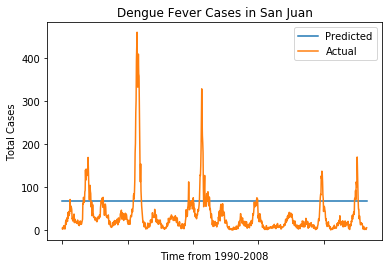

In [20]:
fig1, ax1 = plt.subplots()

plt.plot(sj_time, sj_sess.run(sj_predict, feed_dict={sj_x: sj_features, sj_keep_prob:1}), label="Predicted")
plt.plot(sj_time, sj_labels, label="Actual")
plt.xlabel("Time from 1990-2008")
plt.ylabel("Total Cases")
plt.title("Dengue Fever Cases in San Juan")
ax1.set_xticklabels([])
plt.legend()


In [ ]:
fig2, ax2 = plt.subplots()

plt.plot(iq_time, iq_sess.run(iq_predict, feed_dict={iq_x: iq_features, iq_keep_prob:1}), label="Predicted")
plt.plot(iq_time, iq_labels, label="Actual")
plt.xlabel("Time from 2000-2010")
plt.ylabel("Total Cases")
plt.title("Dengue Fever Cases in Iquitos")
ax2.set_xticklabels([])
plt.legend()
